In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

# Read the data
ames = pd.read_csv("AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [2]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-2.59303720e+21, -1.13145211e+19, -7.57138616e+20, -4.47669752e+18,
       -2.55949915e+20])

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

ct = ColumnTransformer(
    transformers=[
        ("dummy", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include="object")),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge(alpha=1))
])

ridge_cv_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring="r2")
ridge_mse = -ridge_cv_scores.mean()
print(ridge_mse)


-0.8619316345217338


In [7]:
from sklearn.linear_model import LinearRegression

linear_pipeline = Pipeline([
    ("preprocessing", ct),
    ("linear_regression", LinearRegression())
])

linear_cv_scores = cross_val_score(linear_pipeline, X, y, cv=5, scoring="r2")
linear_mse = -linear_cv_scores.mean()
print("Cross-validated r2 for Ordinary Linear Regression:", linear_mse)


Cross-validated r2 for Ordinary Linear Regression: 7.243833902756543e+20


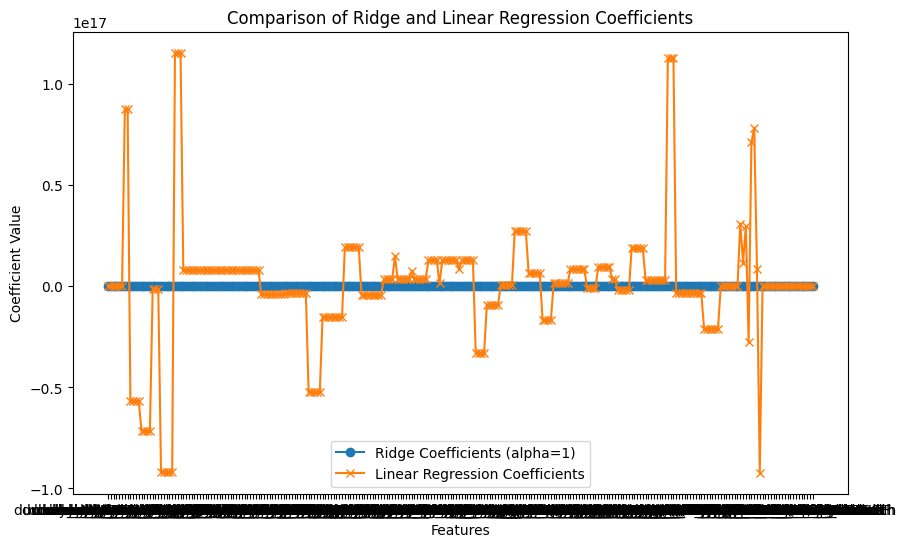

In [9]:
import matplotlib.pyplot as plt

ridge_pipeline.fit(X, y)
ridge_coefs = ridge_pipeline.named_steps["ridge_regression"].coef_

linear_pipeline.fit(X, y)
linear_coefs = linear_pipeline.named_steps["linear_regression"].coef_

feature_names = ridge_pipeline.named_steps["preprocessing"].get_feature_names_out()

plt.figure(figsize=(10, 6))
plt.plot(feature_names, ridge_coefs, label="Ridge Coefficients (alpha=1)")
plt.plot(feature_names, linear_coefs, label="Linear Regression Coefficients")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.legend()
plt.title("Comparison of Ridge and Linear Regression Coefficients")
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV
ct = ColumnTransformer(
    transformers=[
        ("dummy", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include="object")),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

ridge_pipeline = Pipeline([
    ("preprocessing", ct),
    ("ridge_regression", Ridge())
])

param_grid = {
    "ridge_regression__alpha": [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring="r2")


In [13]:

grid_search.fit(X, y)

best_alpha = grid_search.best_params_["ridge_regression__alpha"]
best_r2 = grid_search.best_score_

print("Best alpha:", best_alpha)
print("Best R2:", best_r2)


Best alpha: 10
Best R2: 0.8642722110166747


In [14]:
from sklearn.linear_model import Lasso

ct = ColumnTransformer(
    transformers=[
        ("dummy", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include="object")),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

lasso_pipeline = Pipeline([
    ("preprocessing", ct),
    ("lasso_regression", Lasso())
])

param_grid = {
    "lasso_regression__alpha": [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring="r2")

In [15]:
grid_search.fit(X, y)
best_alpha = grid_search.best_params_["lasso_regression__alpha"]
best_r2 = grid_search.best_score_

print("Best alpha for LASSO:", best_alpha)
print("Best R2 score from cross-validation:", best_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e

Best alpha for LASSO: 10
Best R2 score from cross-validation: 0.860632243732114


In [34]:
from sklearn.linear_model import ElasticNet

ct = ColumnTransformer(
    transformers=[
        ("dummy", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include="object")),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

elastic_net_pipeline = Pipeline([
    ("preprocessing", ct),
    ("elastic_net", ElasticNet(max_iter=10000))
])

param_grid = {
    "elastic_net__alpha": [1, 10, 100, 1000],
    "elastic_net__l1_ratio": [0.1, 0.5, 0.7, 0.9, 1]
}

grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring="r2")


In [35]:
grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=5, scoring="r2")
grid_search.fit(X, y)

best_alpha = grid_search.best_params_["elastic_net__alpha"]
best_l1_ratio = grid_search.best_params_["elastic_net__l1_ratio"]
best_r2 = grid_search.best_score_

print("Best alpha for Elastic Net:", best_alpha)
print("Best l1_ratio for Elastic Net:", best_l1_ratio)
print("Best R² score from cross-validation:", best_r2)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.013e+09, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


Best alpha for Elastic Net: 100
Best l1_ratio for Elastic Net: 1
Best R² score from cross-validation: 0.8669311075511448


In [36]:
best_model = grid_search.best_estimator_

best_model.fit(X, y)

coefficients = best_model.named_steps["elastic_net"].coef_
feature_names = best_model.named_steps["preprocessing"].get_feature_names_out()
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
print(coefficients_df)


                       Feature  Coefficient
0     dummy__MS Zoning_C (all)    -0.000000
1          dummy__MS Zoning_FV     0.000000
2     dummy__MS Zoning_I (all)    -0.000000
3          dummy__MS Zoning_RH     0.000000
4          dummy__MS Zoning_RL     0.000000
..                         ...          ...
249  standardize__Screen Porch  2829.886060
250     standardize__Pool Area   791.915349
251      standardize__Misc Val -4328.443776
252       standardize__Mo Sold  -576.052919
253       standardize__Yr Sold  -767.372632

[254 rows x 2 columns]
